In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Missing Value

In [2]:
df=pd.DataFrame({
    'x1':[4,5,np.nan,6,7,9],
    'x2':[3,5,6,5,np.nan,5],
    'x3':[10,11,12,9,8,11],
    'x4':['A','A','C','C','D',np.nan],
    'x5':['X','Y','X','X',np.nan,'Y'],
    'x6':['M','M',np.nan,'M','N',np.nan]
})
df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10,A,X,M
1,5.0,5.0,11,A,Y,M
2,NaN,6.0,12,C,X,NaN
3,6.0,5.0,9,C,X,M
4,7.0,NaN,8,D,NaN,N
5,9.0,5.0,11,NaN,Y,NaN


In [3]:
df.describe(include='all')

,x1,x2,x3,x4,x5,x6
count,5.000000,5.000000,6.000000,5,5,4
unique,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,C,X,M
freq,NaN,NaN,NaN,2,3,3
mean,6.200000,4.800000,10.166667,NaN,NaN,NaN
std,1.923538,1.095445,1.471960,NaN,NaN,NaN
min,4.000000,3.000000,8.000000,NaN,NaN,NaN
25%,5.000000,5.000000,9.250000,NaN,NaN,NaN
50%,6.000000,5.000000,10.500000,NaN,NaN,NaN
75%,7.000000,5.000000,11.000000,NaN,NaN,NaN


## Simple Imputer  
method dari sklearn untuk mengisi missing value dengan 1 nilai tertentu

In [4]:
from sklearn.impute import SimpleImputer

In [5]:
# impute nilai mean untuk kolom x1,x2,x3
imputer=SimpleImputer(strategy='mean') #bisa diganti median, kalau distribusi data tidak normal
df[['x1','x2','x3']]=imputer.fit_transform(df[['x1','x2','x3']])
df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10.0,A,X,M
1,5.0,5.0,11.0,A,Y,M
2,6.2,6.0,12.0,C,X,NaN
3,6.0,5.0,9.0,C,X,M
4,7.0,4.8,8.0,D,NaN,N
5,9.0,5.0,11.0,NaN,Y,NaN


In [6]:
# impute nilai modus untuk kolom x3 dan x4
imputer_modus= SimpleImputer(strategy='most_frequent') #digunakan terutama untuk data categorical
df[['x4','x5']]=imputer_modus.fit_transform(df[['x4','x5']])
df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10.0,A,X,M
1,5.0,5.0,11.0,A,Y,M
2,6.2,6.0,12.0,C,X,NaN
3,6.0,5.0,9.0,C,X,M
4,7.0,4.8,8.0,D,X,N
5,9.0,5.0,11.0,A,Y,NaN


In [7]:
# isi missing value kolom x6 dengan kategori baru, 'P'
imputer_const=SimpleImputer(strategy='constant',fill_value='P') #bisa dimasukkan angka juga
df['x6']=imputer_const.fit_transform(df[['x6']])
df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10.0,A,X,M
1,5.0,5.0,11.0,A,Y,M
2,6.2,6.0,12.0,C,X,P
3,6.0,5.0,9.0,C,X,M
4,7.0,4.8,8.0,D,X,N
5,9.0,5.0,11.0,A,Y,P


## Iterative Imputer
* untuk data numerik  
* menggunakan algoritma linear regresi berulang untuk menentukan nilai missing value terbaik

In [8]:
df=pd.DataFrame({
    'x1':[4,5,np.nan,6,7,9],
    'x2':[3,5,6,5,np.nan,5],
    'x3':[10,11,12,9,8,11],
    'x4':['A','A','C','C','D',np.nan],
})
df

,x1,x2,x3,x4
0,4.0,3.0,10,A
1,5.0,5.0,11,A
2,NaN,6.0,12,C
3,6.0,5.0,9,C
4,7.0,NaN,8,D
5,9.0,5.0,11,NaN


In [9]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [10]:
iter_imputer= IterativeImputer(random_state=0)
df[['x1','x2','x3']]=iter_imputer.fit_transform(df[['x1','x2','x3']])
df

,x1,x2,x3,x4
0,4.000000,3.000000,10.0,A
1,5.000000,5.000000,11.0,A
2,6.202755,6.000000,12.0,C
3,6.000000,5.000000,9.0,C
4,7.000000,4.705522,8.0,D
5,9.000000,5.000000,11.0,NaN


## KNN Imputer  
* data numerik saja
* menggunakan algoritma KNN untuk menentukan nilai missing value terbaik

In [11]:
df=pd.DataFrame({
    'x1':[4,5,np.nan,6,7,9],
    'x2':[3,5,6,5,np.nan,5],
    'x3':[10,11,12,9,8,11],
    'x4':['A','A','C','C','D',np.nan],
})
df

,x1,x2,x3,x4
0,4.0,3.0,10,A
1,5.0,5.0,11,A
2,NaN,6.0,12,C
3,6.0,5.0,9,C
4,7.0,NaN,8,D
5,9.0,5.0,11,NaN


In [12]:
from sklearn.impute import KNNImputer

In [13]:
knn_imputer= KNNImputer(n_neighbors=2)
df[['x1','x2','x3']]=knn_imputer.fit_transform(df[['x1','x2','x3']])
df

,x1,x2,x3,x4
0,4.0,3.0,10.0,A
1,5.0,5.0,11.0,A
2,7.0,6.0,12.0,C
3,6.0,5.0,9.0,C
4,7.0,5.0,8.0,D
5,9.0,5.0,11.0,NaN


# Latihan

Gunakan data Titanic dari seaborn:
* target: survived
* features: 
    * sex, embark_town,alone --> one hot encoder, drop missing value pada embark_town
    * class --> ordinal encoder
    * age --> coba bandingkan antara iterative imputer dan knn imputer
    * fare --> tidak diapa-apakan
* model: Decision tree classifier, maxdepth=3
* split data: 80-20, random state=2020

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [15]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [16]:

df=df[['sex','age','fare','class','embark_town','alone','survived']]
df

,sex,age,fare,class,embark_town,alone,survived
0,male,22.0,7.2500,Third,Southampton,False,0
1,female,38.0,71.2833,First,Cherbourg,False,1
2,female,26.0,7.9250,Third,Southampton,True,1
3,female,35.0,53.1000,First,Southampton,False,1
4,male,35.0,8.0500,Third,Southampton,True,0
...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,Southampton,True,0
887,female,19.0,30.0000,First,Southampton,True,1
888,female,NaN,23.4500,Third,Southampton,False,0
889,male,26.0,30.0000,First,Cherbourg,True,1


In [17]:
df.isna().sum()

sex              0
age            177
fare             0
class            0
embark_town      2
alone            0
survived         0
dtype: int64

In [18]:
df=df.dropna(subset=['embark_town'])

In [19]:
y=df['survived']
x=df.drop(columns='survived')

In [20]:
# split data
x_train,x_test, y_train, y_test=train_test_split(x,y, stratify=y, test_size=0.2, random_state=2020)

In [21]:
# transformer
mapping= [{'col':'class', 'mapping':{None: 0,'First':1,'Second':2, 'Third':3}}]
transformer1= ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['sex','embark_town','alone']),
    ('Ordinal', ce.OrdinalEncoder(mapping=mapping),['class']),
    ('impute', IterativeImputer(), ['age','fare'])
], remainder='passthrough') 

In [22]:
transformer2= ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['sex','embark_town','alone']),
    ('Ordinal', ce.OrdinalEncoder(mapping=mapping),['class']),
    ('impute', KNNImputer(), ['age','fare'])
], remainder='passthrough') 

In [23]:
age_nan=x_train.reset_index(drop=True)[x_train.reset_index(drop=True)['age'].isna()].index

In [24]:
# transformer1.fit_transform(x)

In [25]:
x_train_1=pd.DataFrame(transformer1.fit_transform(x_train))
x_test_1=pd.DataFrame(transformer1.transform(x_test))

In [26]:
x_train_2=pd.DataFrame(transformer2.fit_transform(x_train))
x_test_2=pd.DataFrame(transformer2.transform(x_test))

In [27]:
feature1=list(transformer1.transformers_[0][1].get_feature_names())+['class','age','fare']

C:\Users\brigi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [28]:
x_train_1.columns=feature1
x_test_1.colums=feature1
x_train_2.columns=feature1
x_test_2.columns=feature1

<ipython-input-28-cd075dd43778>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  x_test_1.colums=feature1


In [29]:
x_train_2.loc[age_nan,'age']

5      32.700
13     39.700
17     21.584
19     29.600
22     29.600
        ...  
698    28.400
700    30.800
703    28.800
707    37.400
710    38.400
Name: age, Length: 145, dtype: float64

In [30]:
display(x_train_1.head(),x_train_2.head())

,x0_male,x1_Queenstown,x1_Southampton,x2_True,class,age,fare
0,1.0,0.0,1.0,1.0,2.0,18.0,11.50
1,0.0,0.0,1.0,0.0,3.0,28.0,14.40
2,0.0,0.0,1.0,1.0,1.0,22.0,151.55
3,0.0,0.0,1.0,1.0,2.0,32.5,13.00
4,1.0,0.0,1.0,1.0,2.0,62.0,10.50


,x0_male,x1_Queenstown,x1_Southampton,x2_True,class,age,fare
0,1.0,0.0,1.0,1.0,2.0,18.0,11.50
1,0.0,0.0,1.0,0.0,3.0,28.0,14.40
2,0.0,0.0,1.0,1.0,1.0,22.0,151.55
3,0.0,0.0,1.0,1.0,2.0,32.5,13.00
4,1.0,0.0,1.0,1.0,2.0,62.0,10.50


In [31]:
## modeling
tree1=DecisionTreeClassifier(max_depth=3)
tree1.fit(x_train_1,y_train)
accuracy_score(y_test,tree1.predict(x_test_1))

C:\Users\brigi\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8033707865168539

In [32]:
tree2=DecisionTreeClassifier(max_depth=3)
tree2.fit(x_train_2,y_train)
accuracy_score(y_test,tree2.predict(x_test_2))

0.8146067415730337

Hasil dari kedua perlakuan (iterative imputer vs knn imputer) kurang lebih sama

# Outliers  
This time, we will illustrate about outlier (global outlier, contextual outlier and collective outlier) and its effect in the modeling especially linear regression.

In [33]:
#data dummy
x = list(np.random.uniform(155,165,100))
x = [round(i,2) for i in x]

y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]
y = [round(i,2) for i in y]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

<ipython-input-33-54a8790defee>:5: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]


In [34]:
df_assotiation = pd.DataFrame({
    'x':x,
    'y':y,
    'y_real':y_real,
})

Text(0, 0.5, 'Weight (Kg)')

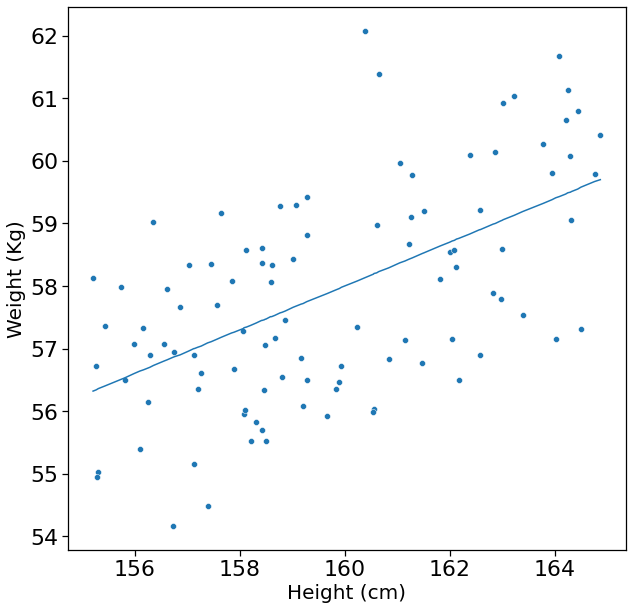

In [35]:
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale=2)
sns.scatterplot(x='x',y='y',data = df_assotiation)
sns.lineplot(x='x',y='y_real',data = df_assotiation)
plt.xlabel('Height (cm)', fontsize = 20)
plt.ylabel('Weight (Kg)', fontsize = 20)

Scatter Plot of two variable without outlier

## Global outliers
Any data points that fall far outside the entire data

In [36]:
#data dummy
x = [191,190]
x = [round(i,2) for i in x]

y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]
y = [round(i,2) for i in y]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

df_add = pd.DataFrame({
    'x':x,
    'y':y,
    'y_real':y_real
})

df_assotiation_outlier = df_assotiation.append(df_add)

<ipython-input-36-f1f849f4c8d5>:5: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]


Text(0, 0.5, 'Weight (Kg)')

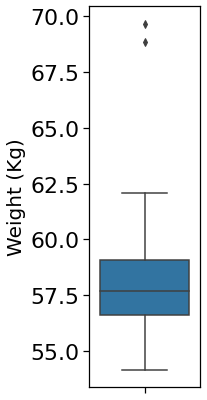

In [38]:
#global outlier for weight
plt.figure(figsize=(2,7))
sns.boxplot(y = df_assotiation_outlier['y'])
plt.ylabel('Weight (Kg)', fontsize = 20)

Text(0.5, 0, 'Height (cm)')

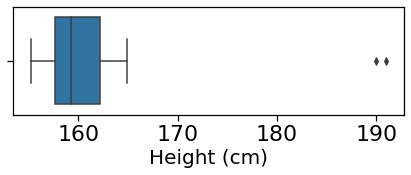

In [39]:
#global outlier fot height
plt.figure(figsize=(7,2))
sns.boxplot(x = df_assotiation_outlier['x'])
plt.xlabel('Height (cm)', fontsize = 20)

## Contextual Outliers
Any Data points that fall outside the data points within the sama context (contoh: berat badan dengan konteks tinggi badan)

In [40]:
x = list(np.random.uniform(155,175,100))
x = [round(i,2) for i in x]

y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]
y = [round(i,2) for i in y]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

<ipython-input-40-11188d5fdd32>:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]


In [41]:
df_assotiation = pd.DataFrame({
    'x':x,
    'y':y,
    'y_real':y_real,
})

In [45]:
x = [155,157]

y = [66,67]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

df_add = pd.DataFrame({
    'x':x,
    'y':y,
    'y_real':y_real
})

df_assotiation_contextual = df_assotiation.append(df_add).reset_index(drop=True)

Text(0, 0.5, 'Weight (Kg)')

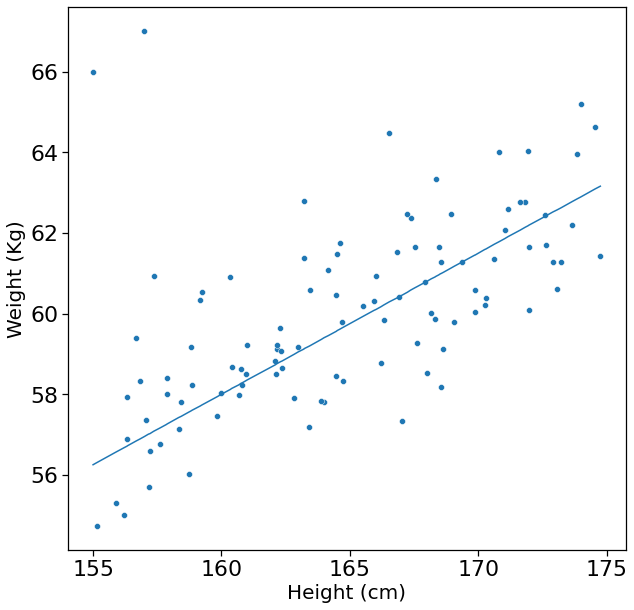

In [47]:
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale=2)
sns.scatterplot(x='x',y='y',data = df_assotiation_contextual)
sns.lineplot(x='x',y='y_real',data = df_assotiation_contextual)
plt.xlabel('Height (cm)', fontsize = 20)
plt.ylabel('Weight (Kg)', fontsize = 20)

contextual outlier : weight around 66 Kg is considered as contextual outlier to 155-157 height.

## Influential Observation 

outliers that broke patterns (usually regression model)

In [51]:
x = [170, 171, 173, 180]

y = [91, 95, 95, 100]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

df_add = pd.DataFrame({
    'x':x,
    'y':y,
    'y_real':y_real
})

df_assotiation_influenced = df_assotiation.append(df_add).reset_index(drop=True)

Text(0, 0.5, 'Weight (Kg)')

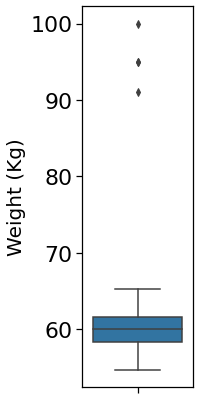

In [52]:
plt.figure(figsize=(2,7))
sns.boxplot(y = df_assotiation_influenced['y'])
plt.ylabel('Weight (Kg)', fontsize = 20)

Text(0, 0.5, 'Weight (Kg)')

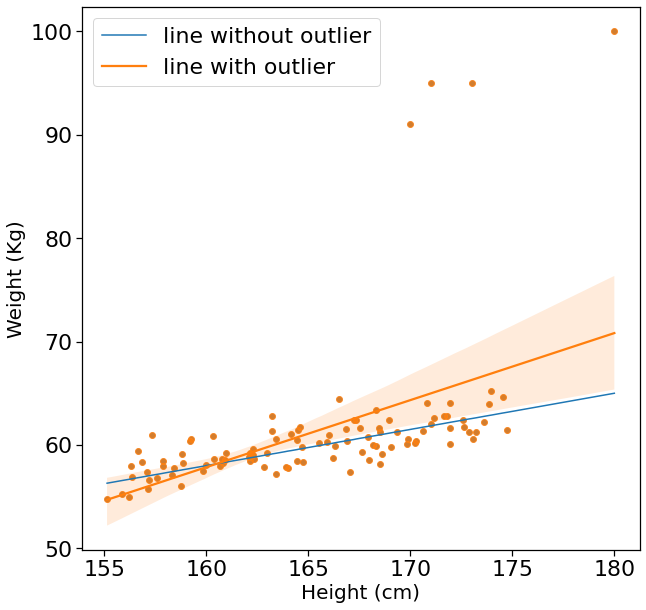

In [53]:
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale=2)
sns.scatterplot(x='x',y='y',data = df_assotiation_influenced)
sns.lineplot(x='x',y='y_real',data = df_assotiation_influenced)
sns.regplot(x='x',y='y',data = df_assotiation_influenced)
plt.legend(['line without outlier','line with outlier'], loc = 'upper left')
plt.xlabel('Height (cm)', fontsize = 20)
plt.ylabel('Weight (Kg)', fontsize = 20)

Text(0.5, 1.0, 'residual plot if outlier included')

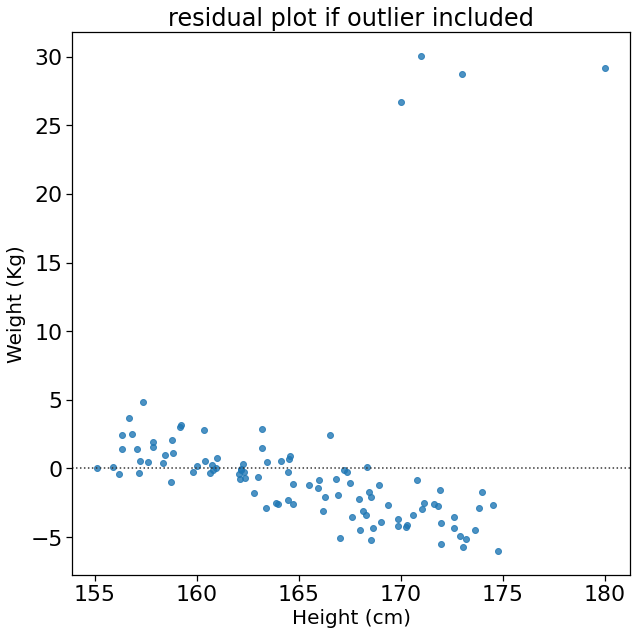

In [54]:
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale=2)
sns.residplot(x='x',y='y',data = df_assotiation_influenced)
plt.xlabel('Height (cm)', fontsize = 20)
plt.ylabel('Weight (Kg)', fontsize = 20)
plt.title('residual plot if outlier included')

Text(0.5, 1.0, 'residual plot if outlier excluded')

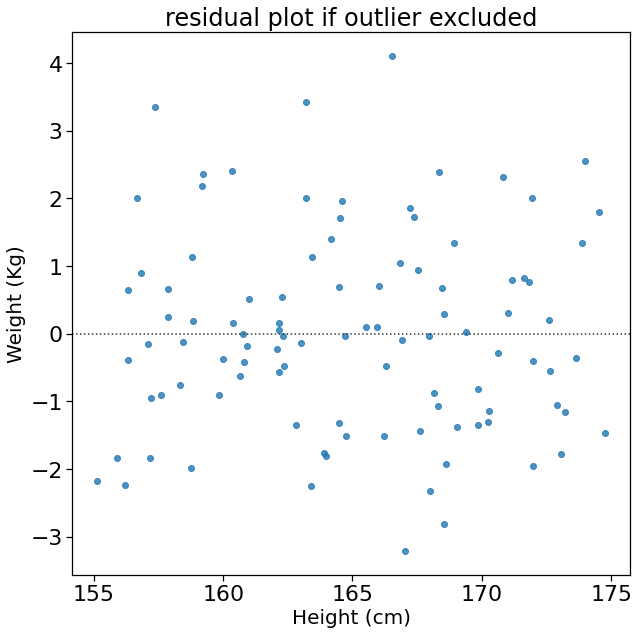

In [55]:
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale=2)
sns.residplot(x='x',y='y',data = df_assotiation)
plt.xlabel('Height (cm)', fontsize = 20)
plt.ylabel('Weight (Kg)', fontsize = 20)
plt.title('residual plot if outlier excluded')

From chart above, we can see a line that influenced by outlier (orange line) and line if there is no outlier (blue line). Outlier just broken the line. Keep in mind that this is not always the case.